# **Lab 3: Multi-Class Classification**

In this third lab we are going to learn how to build an SVM model and a decision tree model for solving a Multi-Class classification problem



## Exercise 2: Multi-class Classification with Decision Tree

In this exercise, you will train a multi-class classifier using Decision Tree.

We are going to use the same dataset as for Exercise 1

You will import the prepared dataset from the following link:


The steps are:
1.   Load and explore dataset
2.   Train Decision Tree with Default Hyperparameters
3.   Reduce Overfitting with min_sample_split
4.   Reduce Further Overfitting with max_depth

## 1. Load and Explore Dataset

**[1.1]** Install specific version of the packages to be used

In [ ]:
#!pip install numpy==1.18.5
#!pip install pandas==1.0.5
#!pip install scikit-learn=="0.22.2.post1"
#!pip install matplotlib==3.2.2

**[1.2]** Task: Import the pandas package

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import the pandas package

In [1]:
# Solution
import pandas as pd

**[1.3]** Let's load the different prepared sets

In [3]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [3]:
from sklearn.preprocessing import OrdinalEncoder
buying_price_cats = [['low', 'med', 'high', 'vhigh']]
buying_price_enc = OrdinalEncoder(categories=buying_price_cats)
df_cleaned=X.copy()
df_cleaned['buying_price_encoded'] = buying_price_enc.fit_transform(df_cleaned[['buying']])
df_cleaned[['buying','buying_price_encoded']]
df_cleaned['buying'] = df_cleaned['buying_price_encoded']
df_cleaned.drop('buying_price_encoded', axis=1, inplace=True)
maintenance_cost_cats = [['low', 'med', 'high', 'vhigh']]
maintenance_cost_enc = OrdinalEncoder(categories=maintenance_cost_cats)
df_cleaned['maint'] = maintenance_cost_enc.fit_transform(df_cleaned[['maint']])
cats_dict = {
    'doors': [['2', '3', '4', '5more']],
    'persons': [['2', '4', 'more']],
    'lug_boot': [['small', 'med', 'big']],
    'safety': [['low', 'med', 'high']]
}
for col, cats in cats_dict.items():
  col_encoder = OrdinalEncoder(categories=cats)
  df_cleaned[col] = col_encoder.fit_transform(df_cleaned[[col]])
df_cleaned.head()

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0
2,3.0,3.0,0.0,0.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0


In [4]:
X = df_cleaned
from sklearn.model_selection import train_test_split
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

**[1.4]** Task: Display the first 5 rows of X_train

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the first 5 rows of X_train

In [5]:
# Solution
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
298,3.0,1.0,3.0,0.0,0.0,1.0
88,3.0,3.0,3.0,0.0,2.0,1.0
20,3.0,3.0,0.0,2.0,0.0,2.0
502,2.0,3.0,2.0,1.0,2.0,1.0
998,1.0,2.0,0.0,2.0,2.0,2.0


In [6]:
y_train

,class
298,unacc
88,unacc
20,unacc
502,unacc
998,acc
...,...
295,acc
1273,unacc
515,unacc
143,unacc


## 2. Train Decision Tree with Default Hyperparameters

**[2.1]** Task: Import DecisionTreeClassifier from sklearn.tree

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import DecisionTreeClassifier from sklearn.tree

In [7]:
# Solution
from sklearn.tree import DecisionTreeClassifier

**[2.2]** Task: Instantiate a DecisionTreeClassifier() model with random_state=8 parameter in order to keep our results consistent

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate a DecisionTreeClassifier() model with random_state=8 parameter in order to keep our results consistent

In [9]:
# Solution
tree_1 = DecisionTreeClassifier(random_state=8)

**[3.3]** Task: Train the model on the training set



In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Train the model on the training set

In [10]:
# Solution
tree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

**[3.4]** Task: Print the accuracy score of the training set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the accuracy score of the training set

In [11]:
# Solution
tree_1.score(X_train, y_train)

1.0

**[3.5]** Task: Print the accuracy score of the validation set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the accuracy score of the validation set

In [12]:
# Solution
tree_1.score(X_val, y_val)

0.9530685920577617

Our default Decision Tree model is already doing very good job but it is obviously overfitting.

## 3. Reduce Overfitting with min_samples_split

**[3.1]** Task: Train a DecisionTree model with min_samples_split=5 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a DecitionTree model with min_samples_split=5 and print the accuracy score for the training and validation sets

In [13]:
# Solution
tree_split_1 = DecisionTreeClassifier(random_state=8, min_samples_split=5).fit(X_train, y_train)
print(tree_split_1.score(X_train, y_train))
print(tree_split_1.score(X_val, y_val))

0.9936651583710407
0.9350180505415162


**[3.2]** Task: Train a DecisionTree model with min_samples_split=10 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a DecisionTree model with min_samples_split=10 and print the accuracy score for the training and validation sets

In [14]:
# Solution
tree_split_2 = DecisionTreeClassifier(random_state=8, min_samples_split=10).fit(X_train, y_train)
print(tree_split_2.score(X_train, y_train))
print(tree_split_2.score(X_val, y_val))

0.9755656108597285
0.9350180505415162


**[3.3]** Task: Train a DecisionTree model with min_samples_split=20 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a DecisionTree model with min_samples_split=20 and print the accuracy score for the training and validation sets

In [15]:
# Solution
tree_split_3 = DecisionTreeClassifier(random_state=8, min_samples_split=20).fit(X_train, y_train)
print(tree_split_3.score(X_train, y_train))
print(tree_split_3.score(X_val, y_val))

0.9547511312217195
0.9097472924187726


So far the best model is the one with min_samples_split=10

**[3.4]** Task: Import plot_confusion_matrix from sklearn.metrics and matplotlib

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Import plot_confusion_matrix from sklearn.metrics and matplotlib

In [16]:
# Solution
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[3.5]** Task: Print the confusion matrices for the training and validation sets for this model

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Print the confusion matrices for the training and validation sets for this model

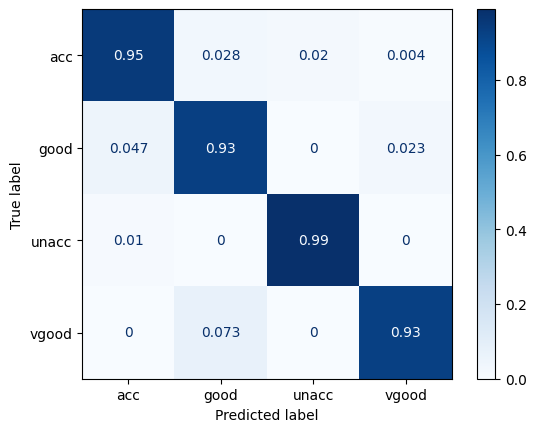

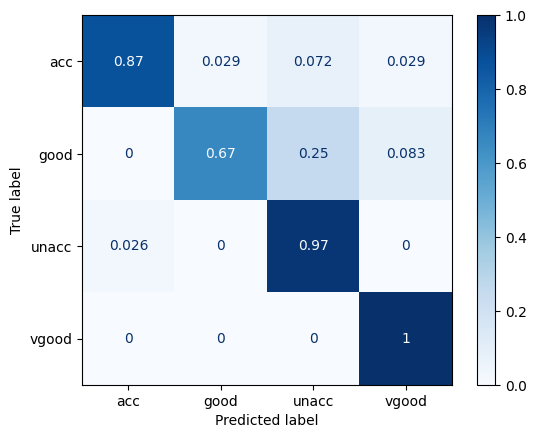

In [17]:
# Solution
ConfusionMatrixDisplay.from_estimator(tree_split_2, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_split_2, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

## 4. Reduce Further Overfitting with max_depth

Decreasing the max depth of a Decision Tree will always decrease the accuracy but it will also increase the generalisation power of the model. This means that if we encounter a situation where our Decision Tree is overfitting then we can decide to reduce the max depth of the model to better generalise new data.


**[4.1]** Let's have a look at what is the current value for this hyperparameter

In [18]:
tree_1.tree_.max_depth

11

**[4.2]** Task: Train a DecisionTree model with min_samples_split=10, max_depth=3 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a DecisionTree model with min_samples_split=10, max_depth=3 and print the accuracy score for the training and validation sets

In [19]:
# Solution
tree_depth_1 = DecisionTreeClassifier(random_state=8, min_samples_split=10, max_depth=3).fit(X_train, y_train)
print(tree_depth_1.score(X_train, y_train))
print(tree_depth_1.score(X_val, y_val))

0.7873303167420814
0.8122743682310469


**[4.3]** Task: Train a DecisionTree model with min_samples_split=10, max_depth=8 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a DecisionTree model with min_samples_split=10, max_depth=8 and print the accuracy score for the training and validation sets

In [20]:
# Solution
tree_depth_2 = DecisionTreeClassifier(random_state=8, min_samples_split=10, max_depth=8).fit(X_train, y_train)
print(tree_depth_2.score(X_train, y_train))
print(tree_depth_2.score(X_val, y_val))

0.9737556561085973
0.9314079422382672


**[4.4]** Task: Train a DecisionTree model with min_samples_split=10, max_depth=6 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a DecisionTree model with min_samples_split=10, max_depth=6 and print the accuracy score for the training and validation sets

In [21]:
# Solution
tree_depth_3 = DecisionTreeClassifier(random_state=8, min_samples_split=10, max_depth=6).fit(X_train, y_train)
print(tree_depth_3.score(X_train, y_train))
print(tree_depth_3.score(X_val, y_val))

0.9375565610859729
0.924187725631769


This is the best model with not much overfitting

**[4.5]** Task: Print the accuracy of our best model on the testing set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the accuracy of our best model on the testing set

In [22]:
# Solution
tree_depth_3.score(X_test, y_test)

0.9335260115606936

**[4.6]** Task: Print the confusion matrix for this model on the testing set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the confusion matrix for this model on the testing set

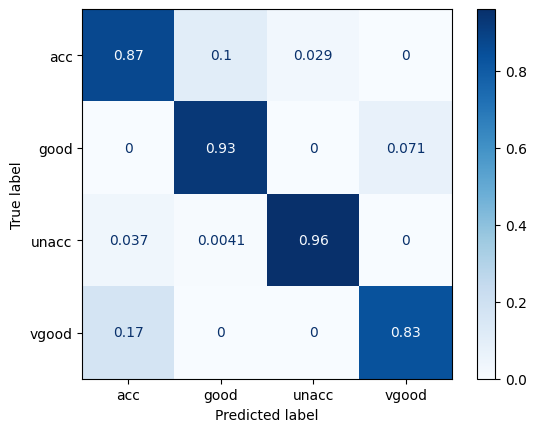

In [23]:
# Solution
ConfusionMatrixDisplay.from_estimator(tree_depth_3, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [24]:
tree_depth_3.tree_

This model is generalising quite well but it is struggling a bit to predict accurately 'acc'. This model is slightly worse than the best SVC from Exercise 1.